<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day8/Convolutions__Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cat vs Non-Cat

In [0]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [0]:
# Load training data
train_dataset = h5py.File('train_catvnoncat.h5', "r")
Xtr = np.array(train_dataset["train_set_x"][:]) # train set features
Ytr = np.array(train_dataset["train_set_y"][:]) # train set labels

In [0]:
# Load test data
test_dataset = h5py.File('test_catvnoncat.h5', "r")
Xts = np.array(test_dataset["test_set_x"][:]) # test set features
Yts = np.array(test_dataset["test_set_y"][:]) # test set labels

0


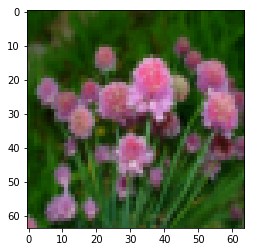

In [0]:
i = 21
plt.imshow(Xtr[i,:,:,:])
print(Ytr[i])

In [0]:
Xtr = Xtr/255
Xts = Xts/255

In [0]:
print(Xtr.shape)
print(Ytr.shape)
print(Xts.shape)
print(Yts.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [0]:
hist = model.fit(Xtr, Ytr, epochs=10, batch_size=10, shuffle = True, validation_data=(Xts,Yts))

Train on 209 samples, validate on 50 samples
Epoch 1/10
209/209 [==============================] - 1s 6ms/sample - loss: 0.6553 - acc: 0.6220 - val_loss: 0.7647 - val_acc: 0.3400
Epoch 2/10
209/209 [==============================] - 1s 6ms/sample - loss: 0.5805 - acc: 0.6603 - val_loss: 0.8264 - val_acc: 0.3400
Epoch 3/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.5008 - acc: 0.7321 - val_loss: 0.4908 - val_acc: 0.8200
Epoch 4/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.4649 - acc: 0.7799 - val_loss: 0.7295 - val_acc: 0.4000
Epoch 5/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.4470 - acc: 0.7512 - val_loss: 0.5583 - val_acc: 0.6600
Epoch 6/10
209/209 [==============================] - 1s 6ms/sample - loss: 0.4228 - acc: 0.7943 - val_loss: 0.4889 - val_acc: 0.7400
Epoch 7/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.3884 - acc: 0.8038 - val_loss: 0.4055 - val_acc: 0.8200
Epoch 8/10
209/20

# MNIST Lab

In [0]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

The label corresponding to the image is: 3


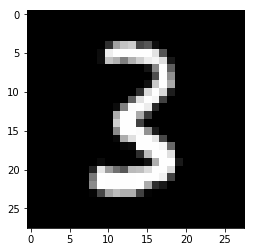

In [0]:
# visualize the data
i = 50000
plt.imshow(training_images[i,:,:], cmap = 'gray')
print("The label corresponding to the image is:",training_labels[i])

In [0]:
training_images = np.reshape(training_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))

print('Training set shape:  ' + str(training_images.shape))
print('Test set shape:  ' + str(test_images.shape))

# normalize the data
training_images = training_images/255
test_images = test_images/255

Training set shape:  (60000, 28, 28, 1)
Test set shape:  (10000, 28, 28, 1)


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(10, activation='sigmoid')  
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)               

In [0]:
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
hist = model.fit(training_images, training_labels, epochs=5, batch_size=10, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 831us/sample - loss: 0.1846 - acc: 0.9412 - val_loss: 0.0914 - val_acc: 0.9733
Epoch 2/5
60000/60000 [==============================] - 50s 832us/sample - loss: 0.0726 - acc: 0.9776 - val_loss: 0.0604 - val_acc: 0.9830
Epoch 3/5
60000/60000 [==============================] - 45s 758us/sample - loss: 0.0560 - acc: 0.9831 - val_loss: 0.0609 - val_acc: 0.9826
Epoch 4/5
60000/60000 [==============================] - 46s 762us/sample - loss: 0.0425 - acc: 0.9873 - val_loss: 0.0533 - val_acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 46s 766us/sample - loss: 0.0387 - acc: 0.9876 - val_loss: 0.0514 - val_acc: 0.9856
